In [1]:
# This is used to increase the notebook's width to fill the screen, allowing for better plot visualization
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import cv2
import time
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from utils import plot
from utils import split

C:\Users\leoar\AppData\Local\Temp\ipykernel_3976\659568940.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Path to Dataset

In [2]:
# Relative path to dataset
data_dir = os.path.join( "..", "..", "..", "..", "Datasets", "COVID19", "Tomografia", "COVIDx CT-3A" )
assert os.path.exists( data_dir ), "Unable to find the relative path to COVIDx CT-3A, please check data_dir..."

#
dataset_name = "COVIDx CT-2A"

## Samples Dataframe

In [3]:
# Path to metadata csv
csv_path = os.path.join( data_dir, "new_split_metadata.csv" )

# List of used sources
source_list = ["radiopaedia.org", "LIDC-IDRI", "COVID-CTset", 
               "Stony Brook", "COVID-CT-MD", "iCTCF", "CNCB"]

# Reads metadata as dataframe, "age" column is treated as str since "N/A" can't be int
samples_df = pd.read_csv(csv_path, sep = ";", na_filter = False, dtype={"age": str})
samples_df["keep"] = samples_df.apply( lambda r: r["source"] in source_list, axis = 1 )
samples_df = samples_df[samples_df["keep"]]
samples_df.reset_index(drop=True, inplace=True)
# samples_df["source"] = samples_df.apply( lambda r: "miniCOVIDxCT" if (r["source"] in source_list) else r["source"], axis = 1)

samples_df.head()

,filename,patient_id,source,class,country,sex,age,partition,slice_selection,x_min,y_min,x_max,y_max,verified_finding,view,modality,keep
0,NCP_96_1328_0032.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,9,94,512,405,Yes,Axial,CT,True
1,NCP_96_1328_0035.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,106,512,405,Yes,Axial,CT,True
2,NCP_96_1328_0036.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,105,512,406,Yes,Axial,CT,True
3,NCP_96_1328_0037.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,104,512,406,Yes,Axial,CT,True
4,NCP_96_1328_0038.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,103,512,406,Yes,Axial,CT,True


## Patients Dataframe

In [4]:
# Creates a new dataframe with metadata sorted by patient
patient_df = plot.convert_df_sample2patient( samples_df )

patient_df.head()

,patient_id,source,class,country,sex,age,partition,slice_selection,verified_finding,view,modality,keep,sample_count
0,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,Yes,Axial,CT,True,121
1,NCP_270,CNCB,COVID-19,China,N/A,N/A,val,Expert,Yes,Axial,CT,True,124
2,NCP_322,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,True,40
3,NCP_1276,CNCB,COVID-19,China,N/A,N/A,test,Expert,Yes,Axial,CT,True,32
4,NCP_2683,CNCB,COVID-19,China,N/A,N/A,test,Expert,Yes,Axial,CT,True,9


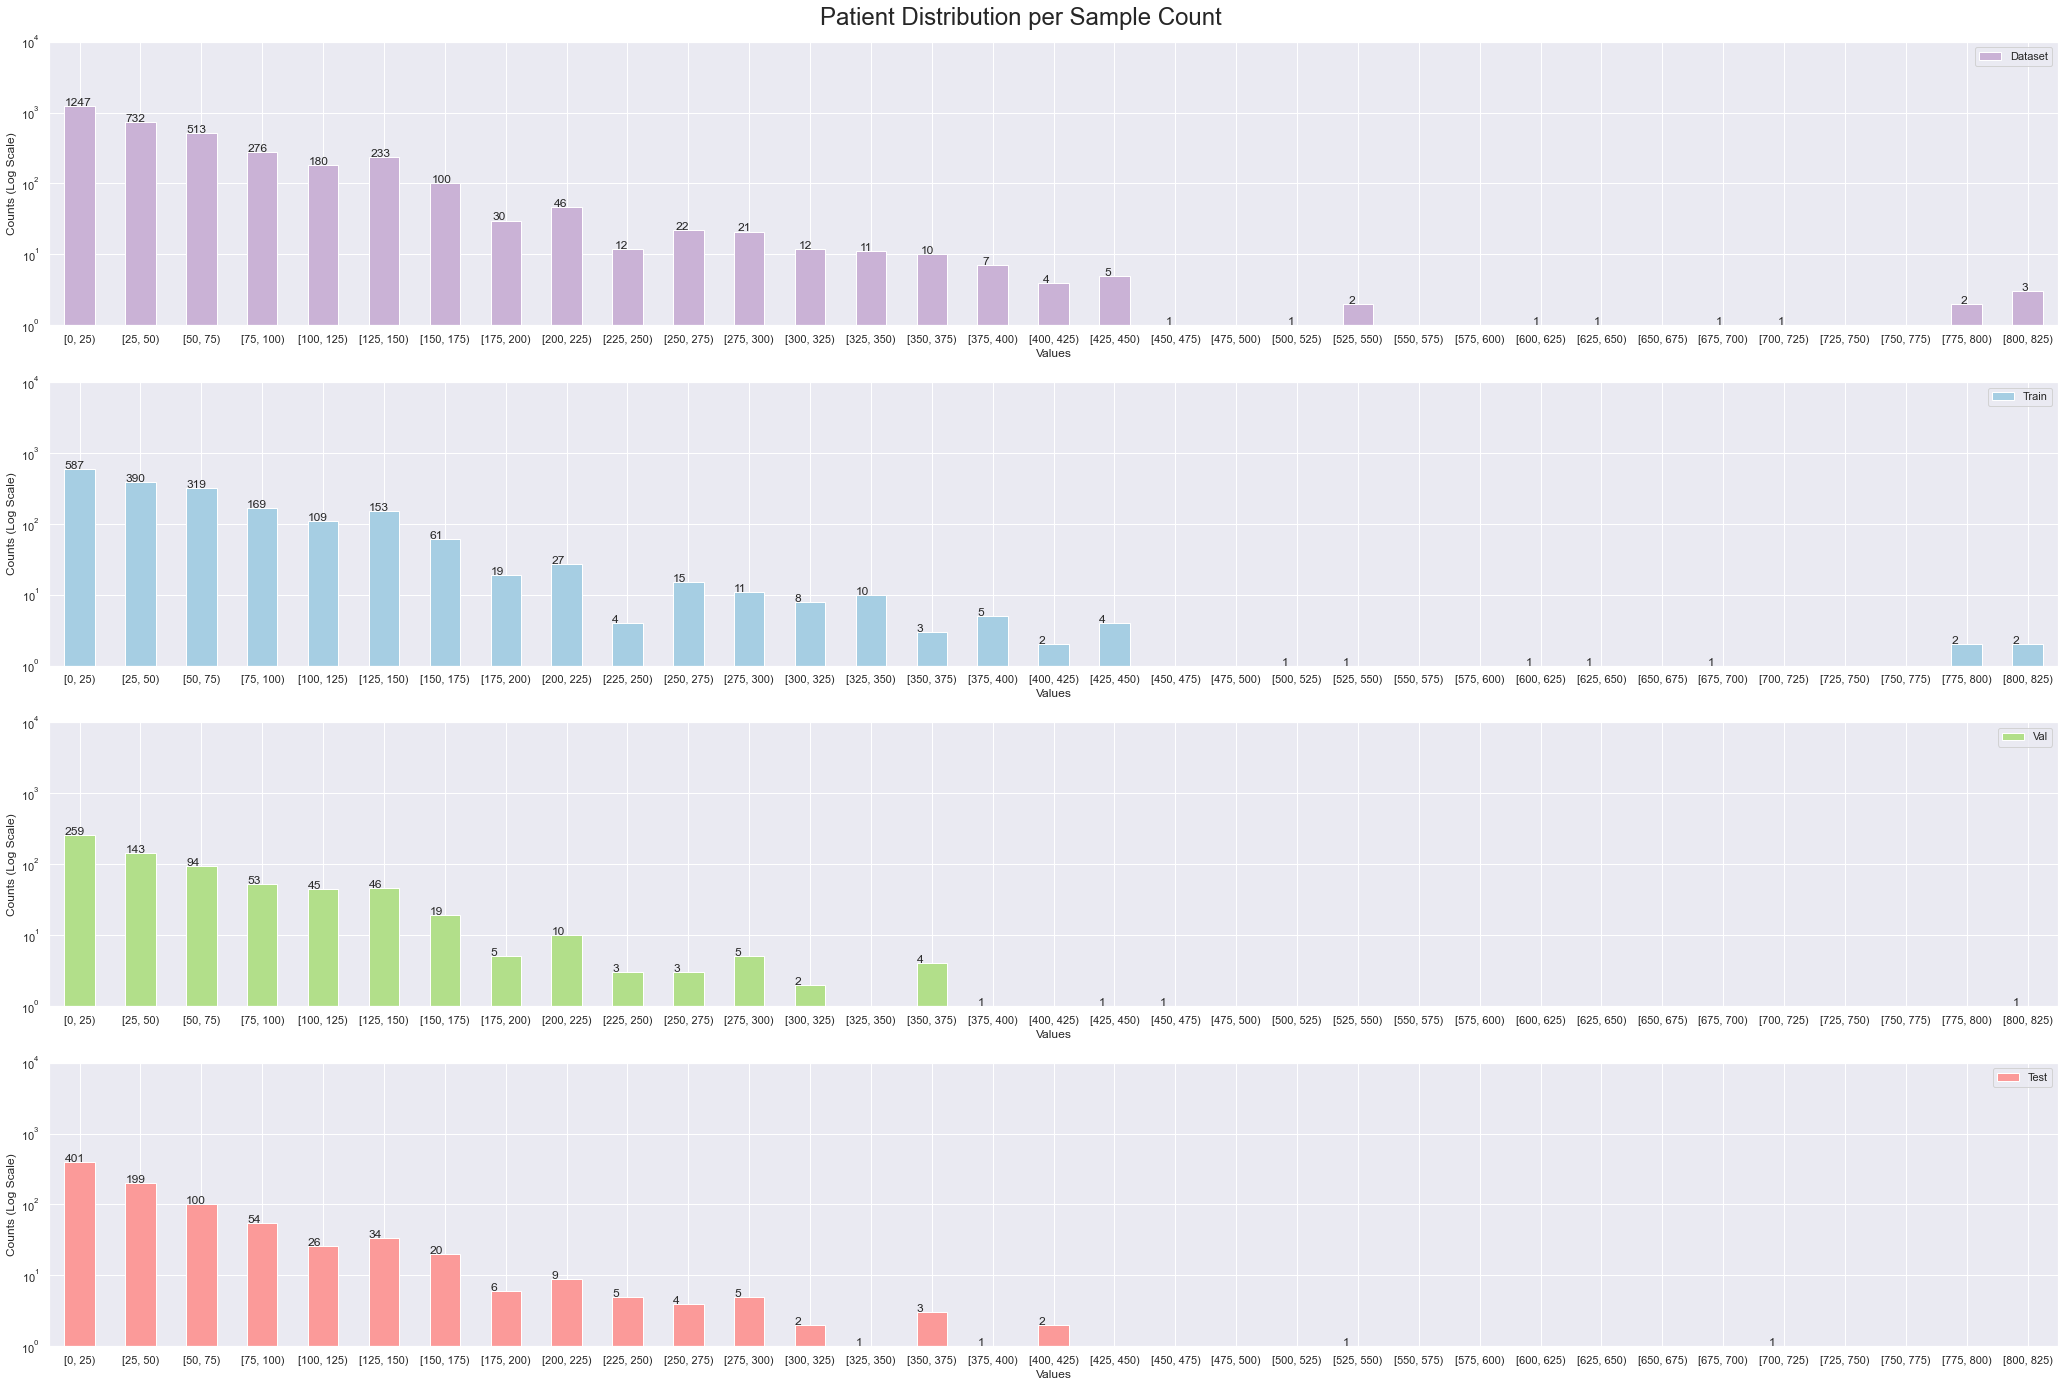

In [5]:
figure = plt.figure( figsize = (36, 24) )
plot.column_per_partition_as_histogram( patient_df, "sample_count", dataset_name, figure, title_complement = "Patient")

In [6]:
counts_df = plot.column_bins_per_partition_as_df( patient_df, "sample_count", dataset_name )
counts_df.head(len(counts_df))

,Dataset,Train,Val,Test
Values,,,,
"[0, 25)",1247,587,259,401
"[25, 50)",732,390,143,199
"[50, 75)",513,319,94,100
"[75, 100)",276,169,53,54
"[100, 125)",180,109,45,26
"[125, 150)",233,153,46,34
"[150, 175)",100,61,19,20
"[175, 200)",30,19,5,6
"[200, 225)",46,27,10,9


# Plots

## Source

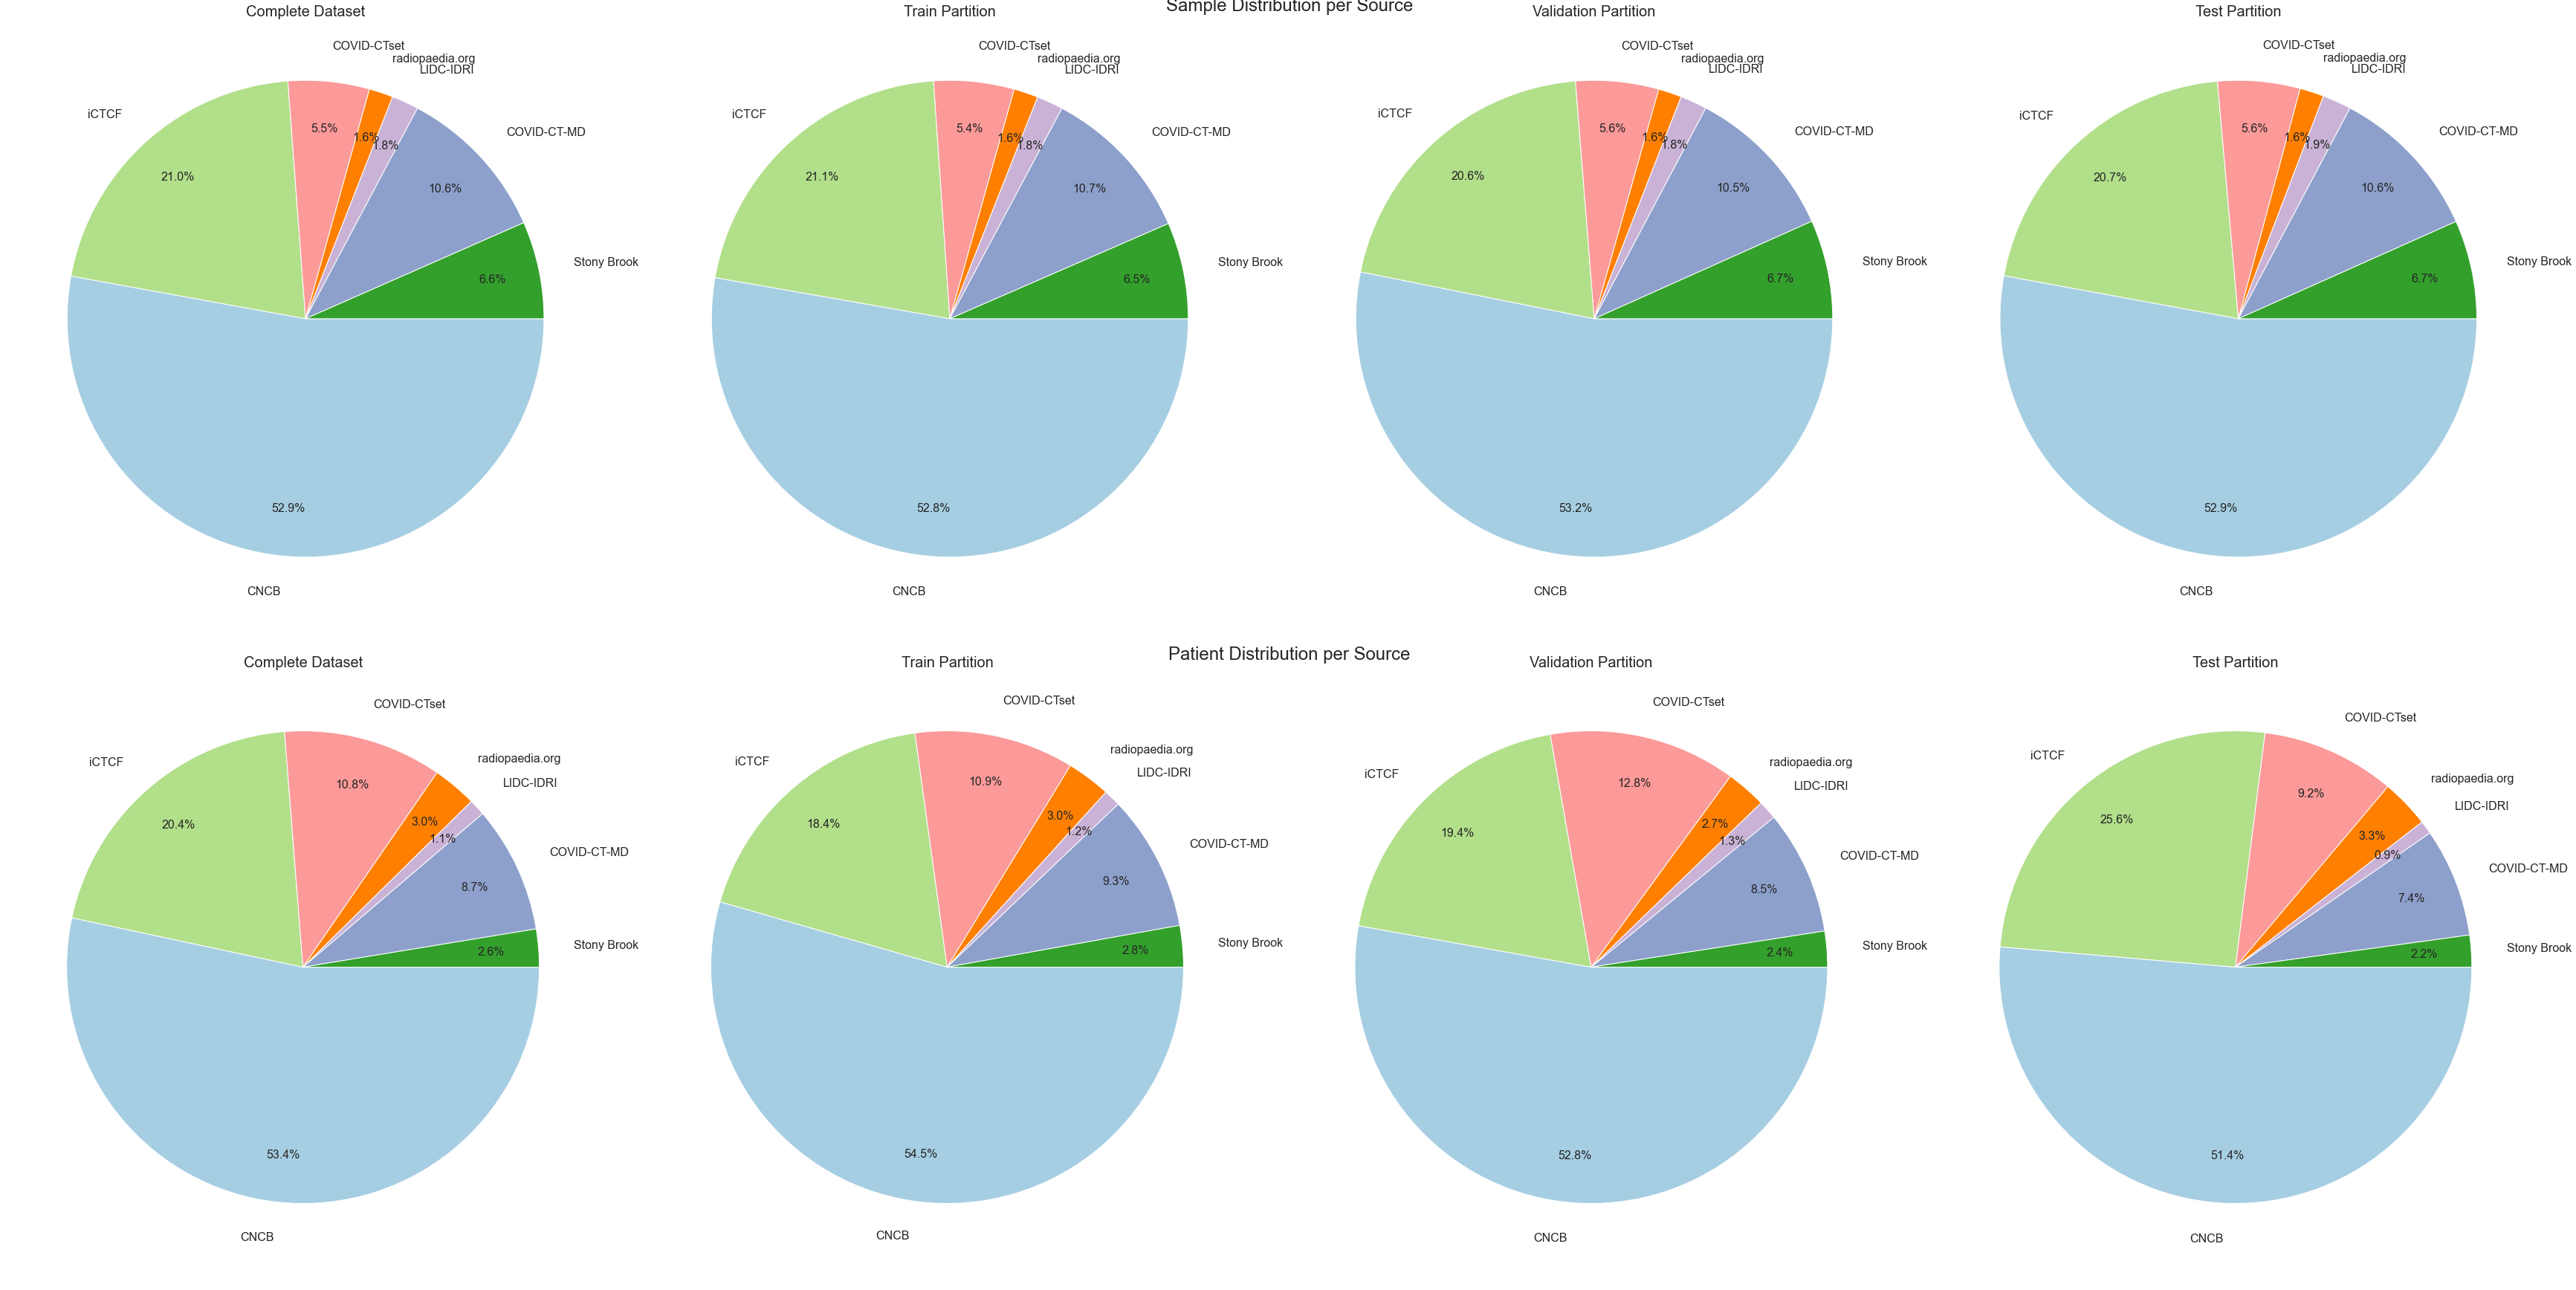

In [7]:
plot.column_as_pies( samples_df, patient_df, "source", dataset_name, figsize = (48, 24) )

## Class

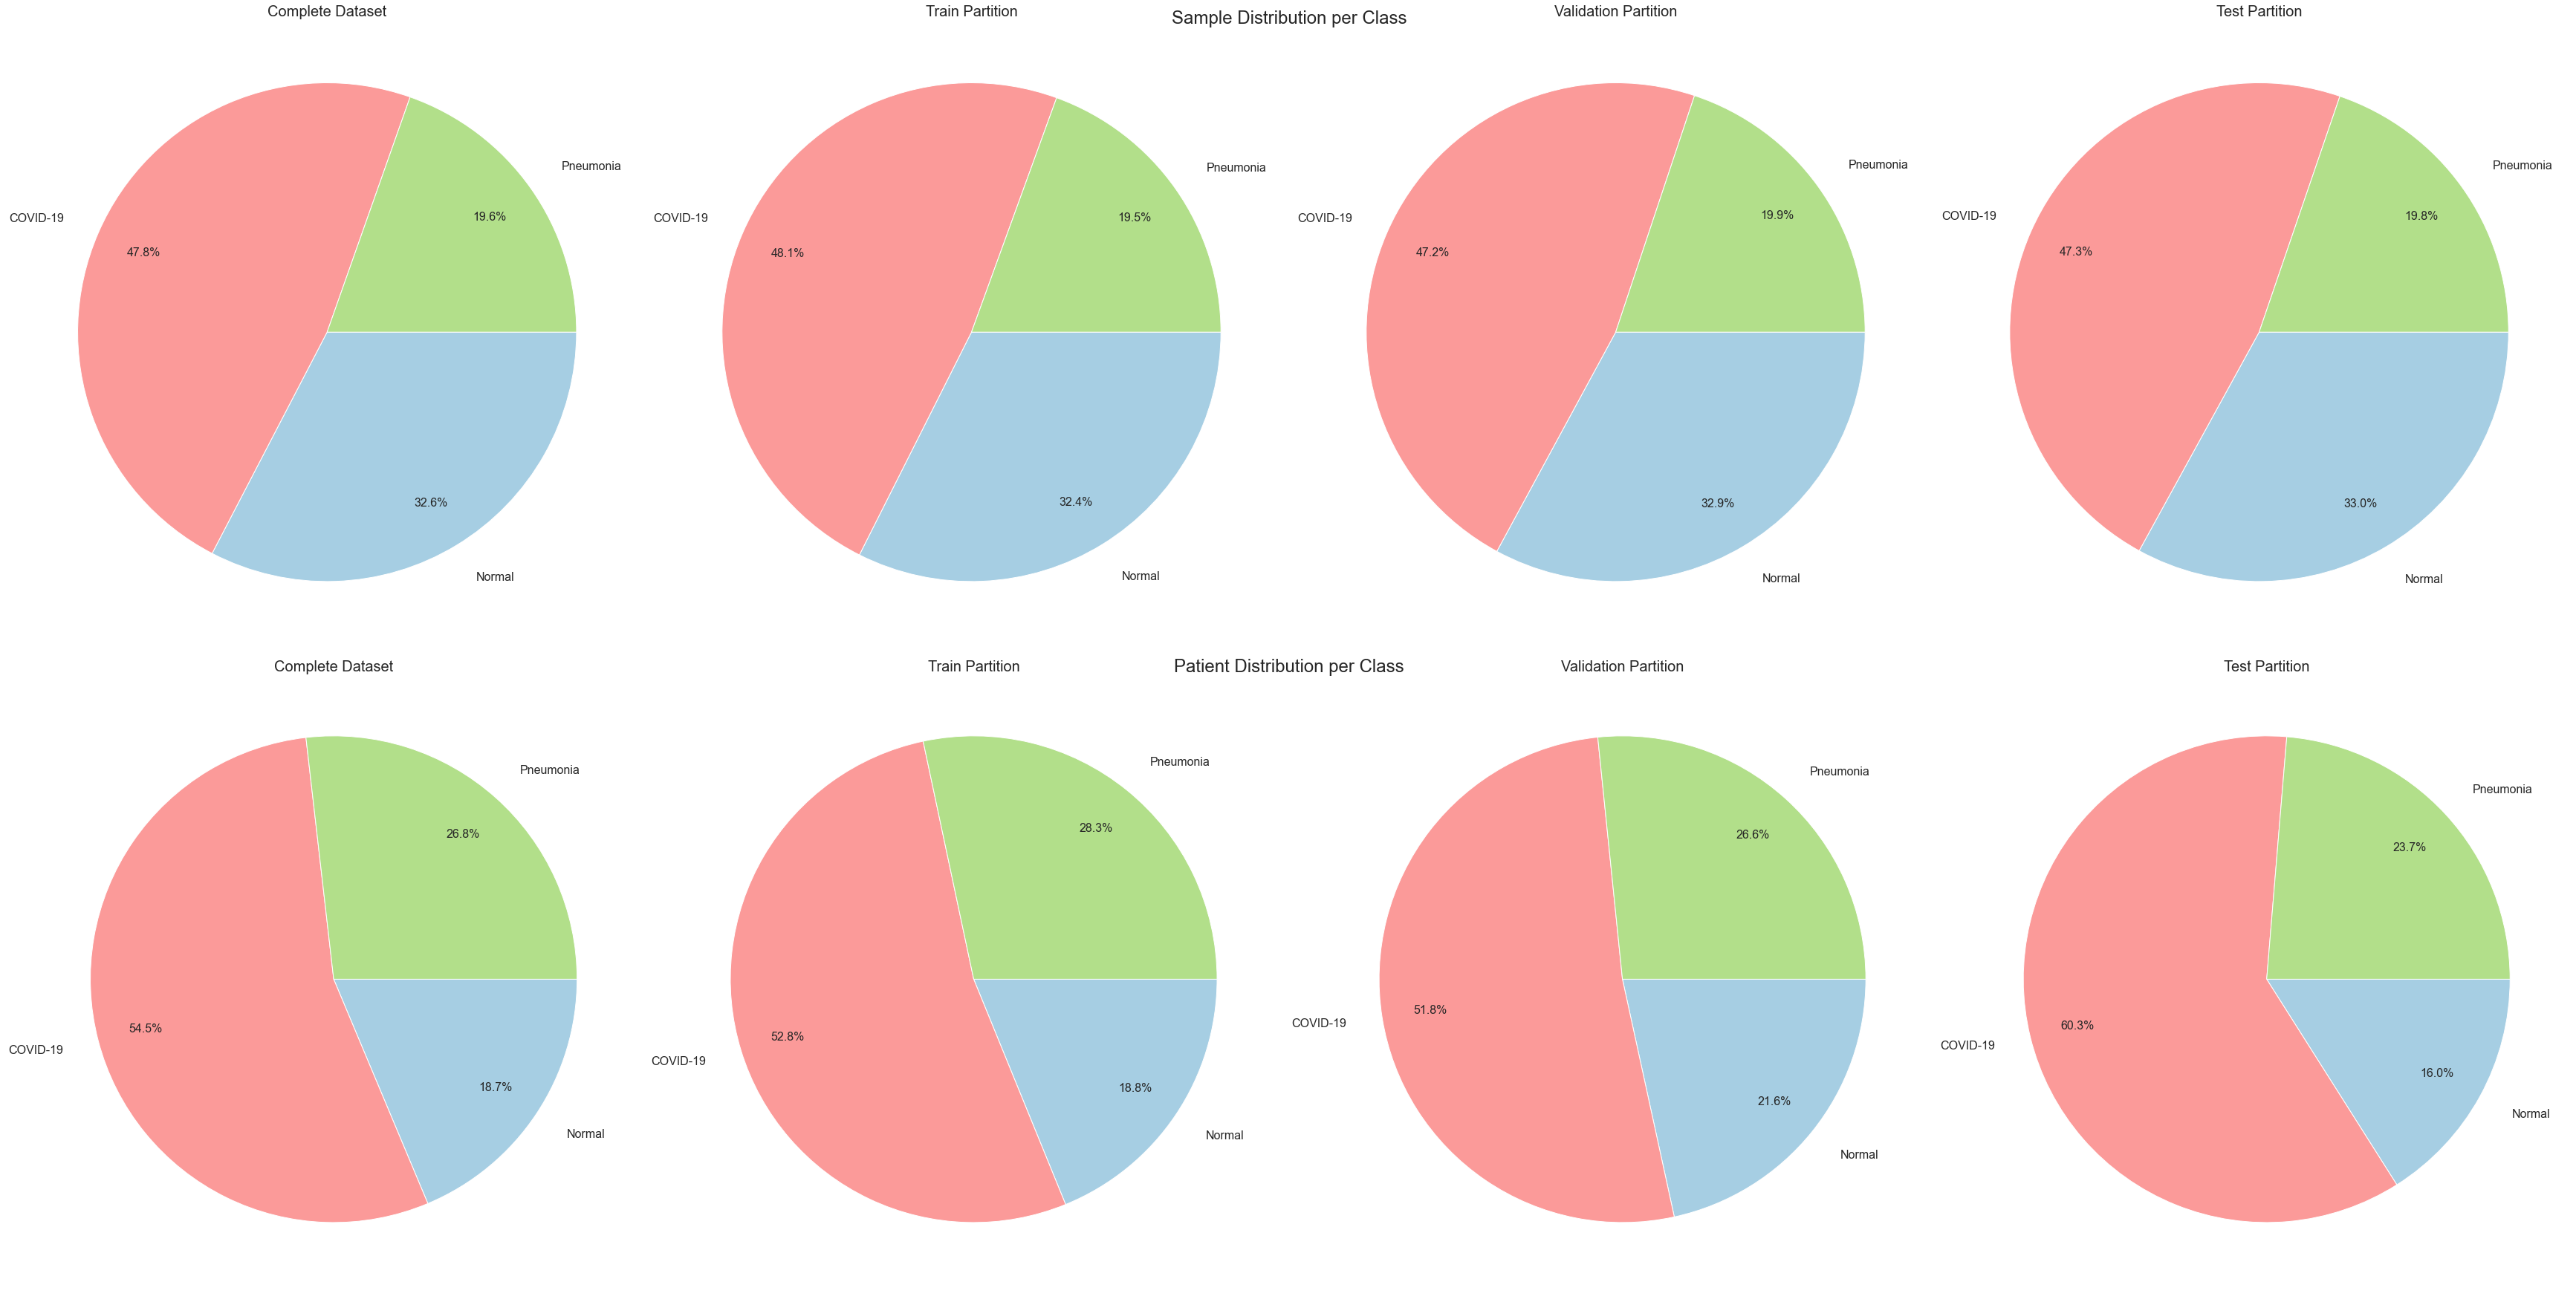

In [8]:
plot.column_as_pies( samples_df, patient_df, "class", dataset_name, figsize = (48, 24) )

In [9]:
plot.column_as_table( samples_df, patient_df, "class", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
COVID-19,104690,63979,20283,20428
Normal,71488,43096,14135,14257
Pneumonia,42943,25865,8541,8537
SUM,219121,132940,42959,43222
,Dataset,Train,Val,Test
Values,,,,
COVID-19,1894,1007,360,527
Pneumonia,932,540,185,207
Normal,649,359,150,140


## Age

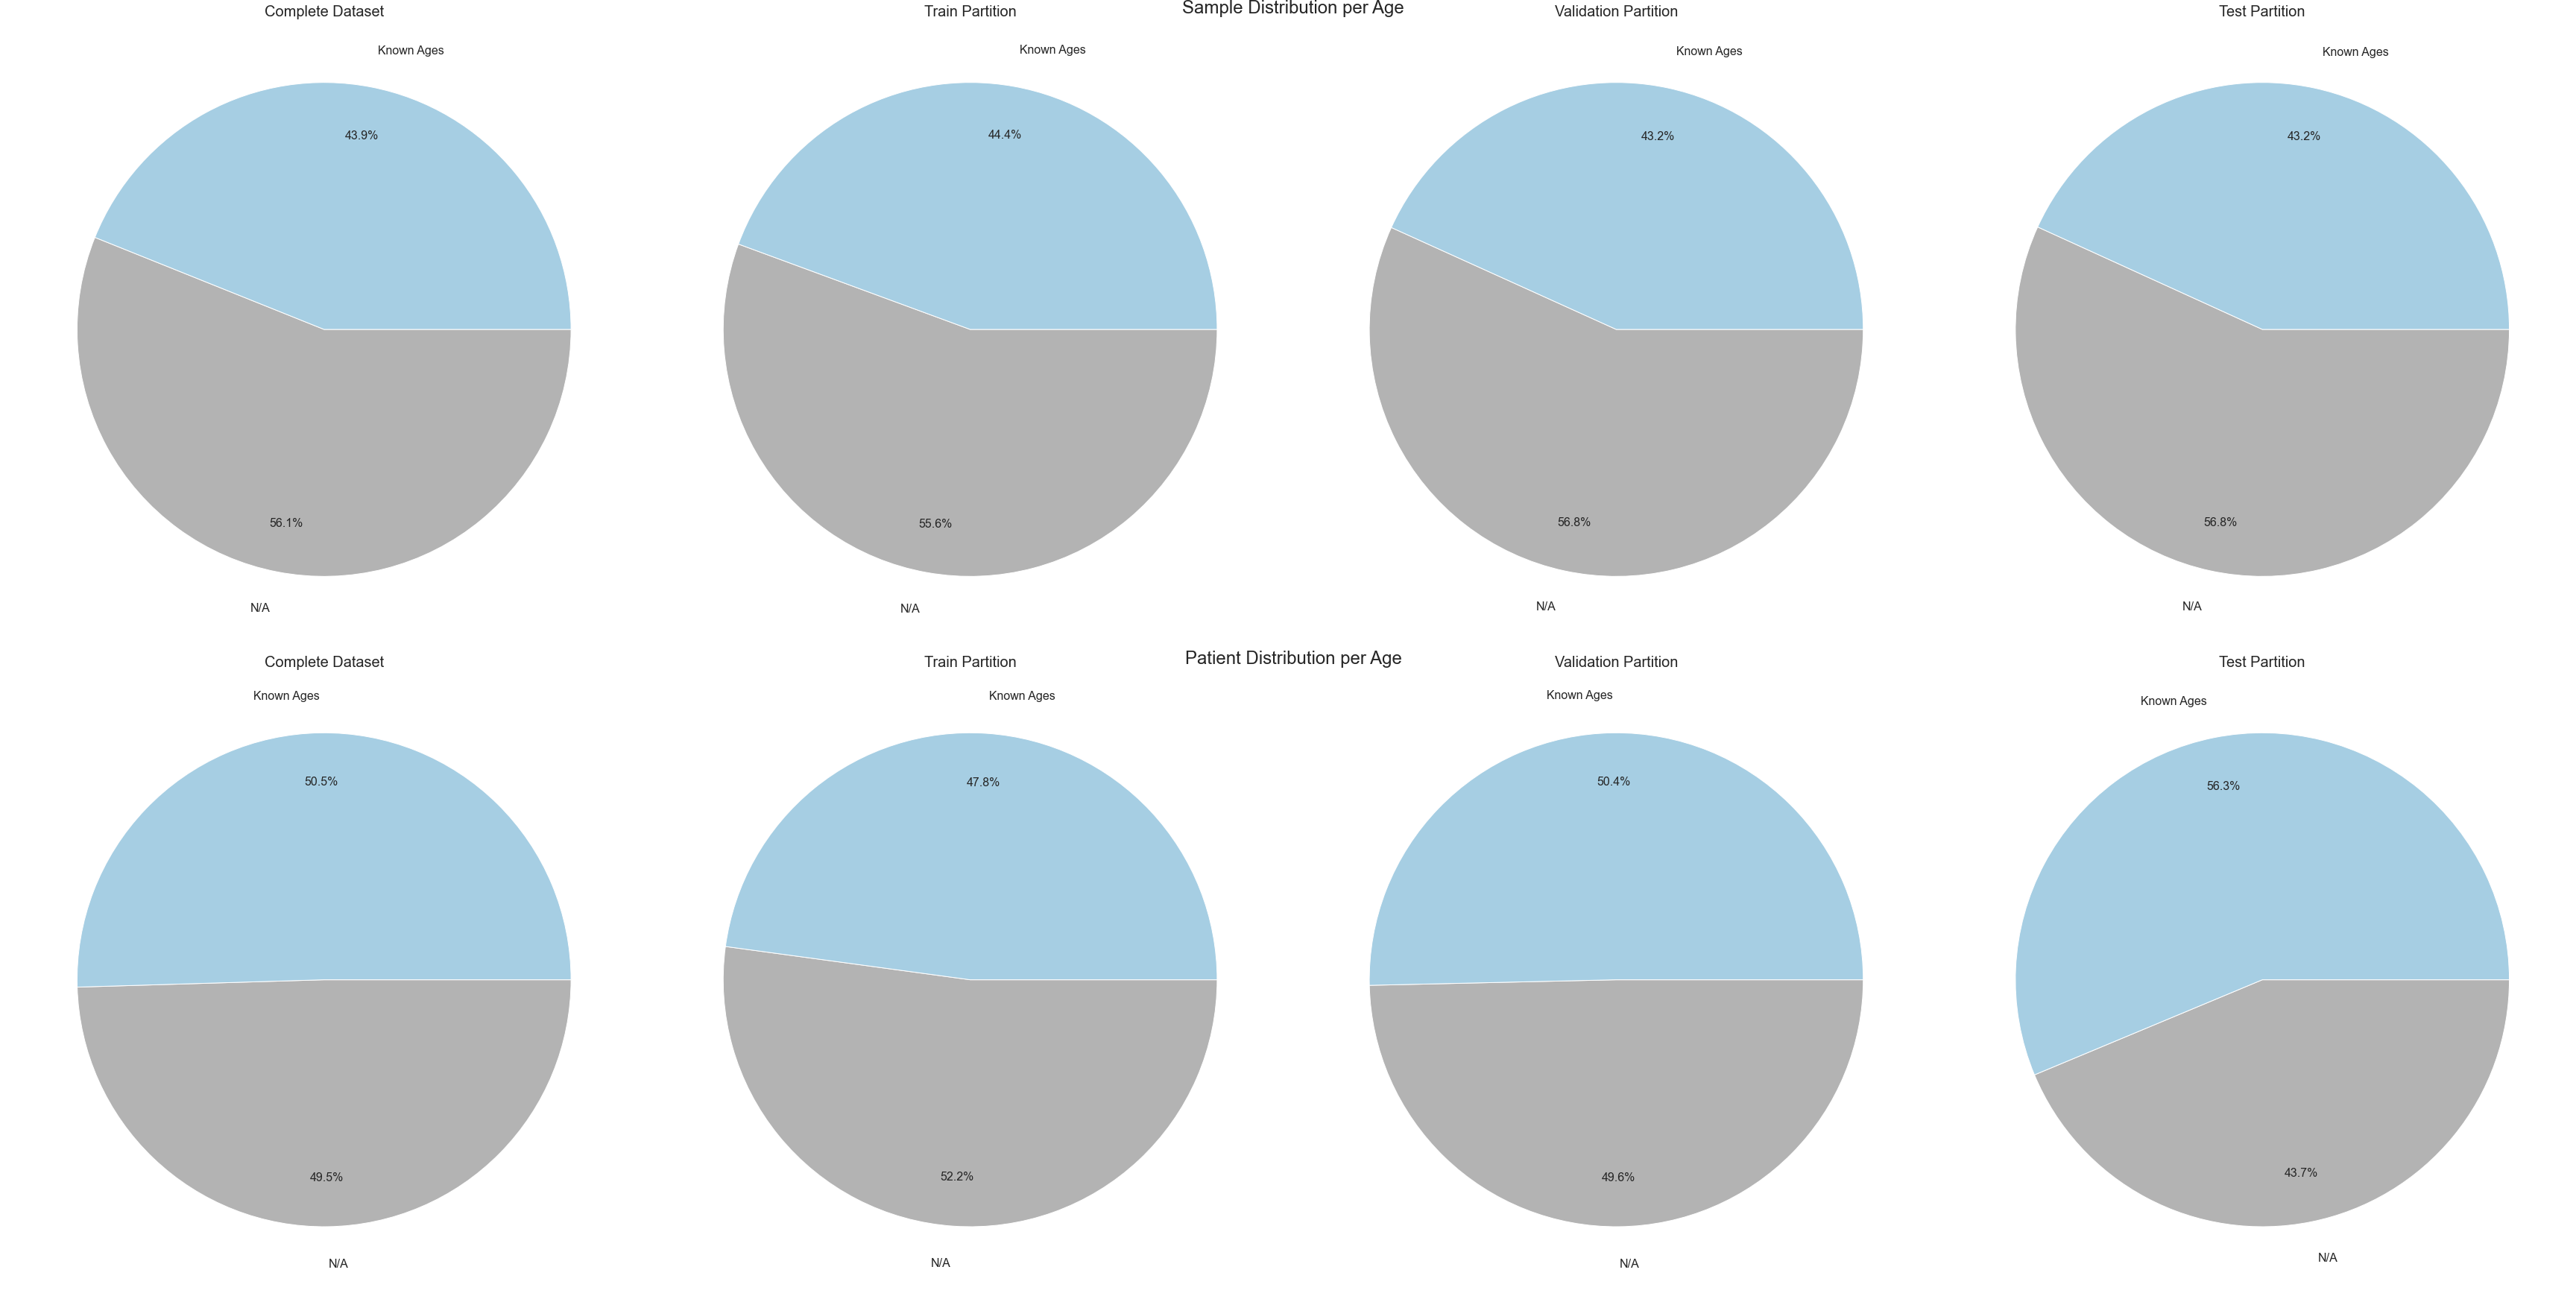

In [10]:
plot.column_as_pies( samples_df, patient_df, "age", dataset_name, figsize = (48, 24))

In [11]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
N/A,122878,73936,24388,24554
Known Ages,96243,59004,18571,18668
SUM,219121,132940,42959,43222
,Dataset,Train,Val,Test
Values,,,,
N/A,1721,994,345,382
Known Ages,1754,912,350,492
SUM,3475,1906,695,874


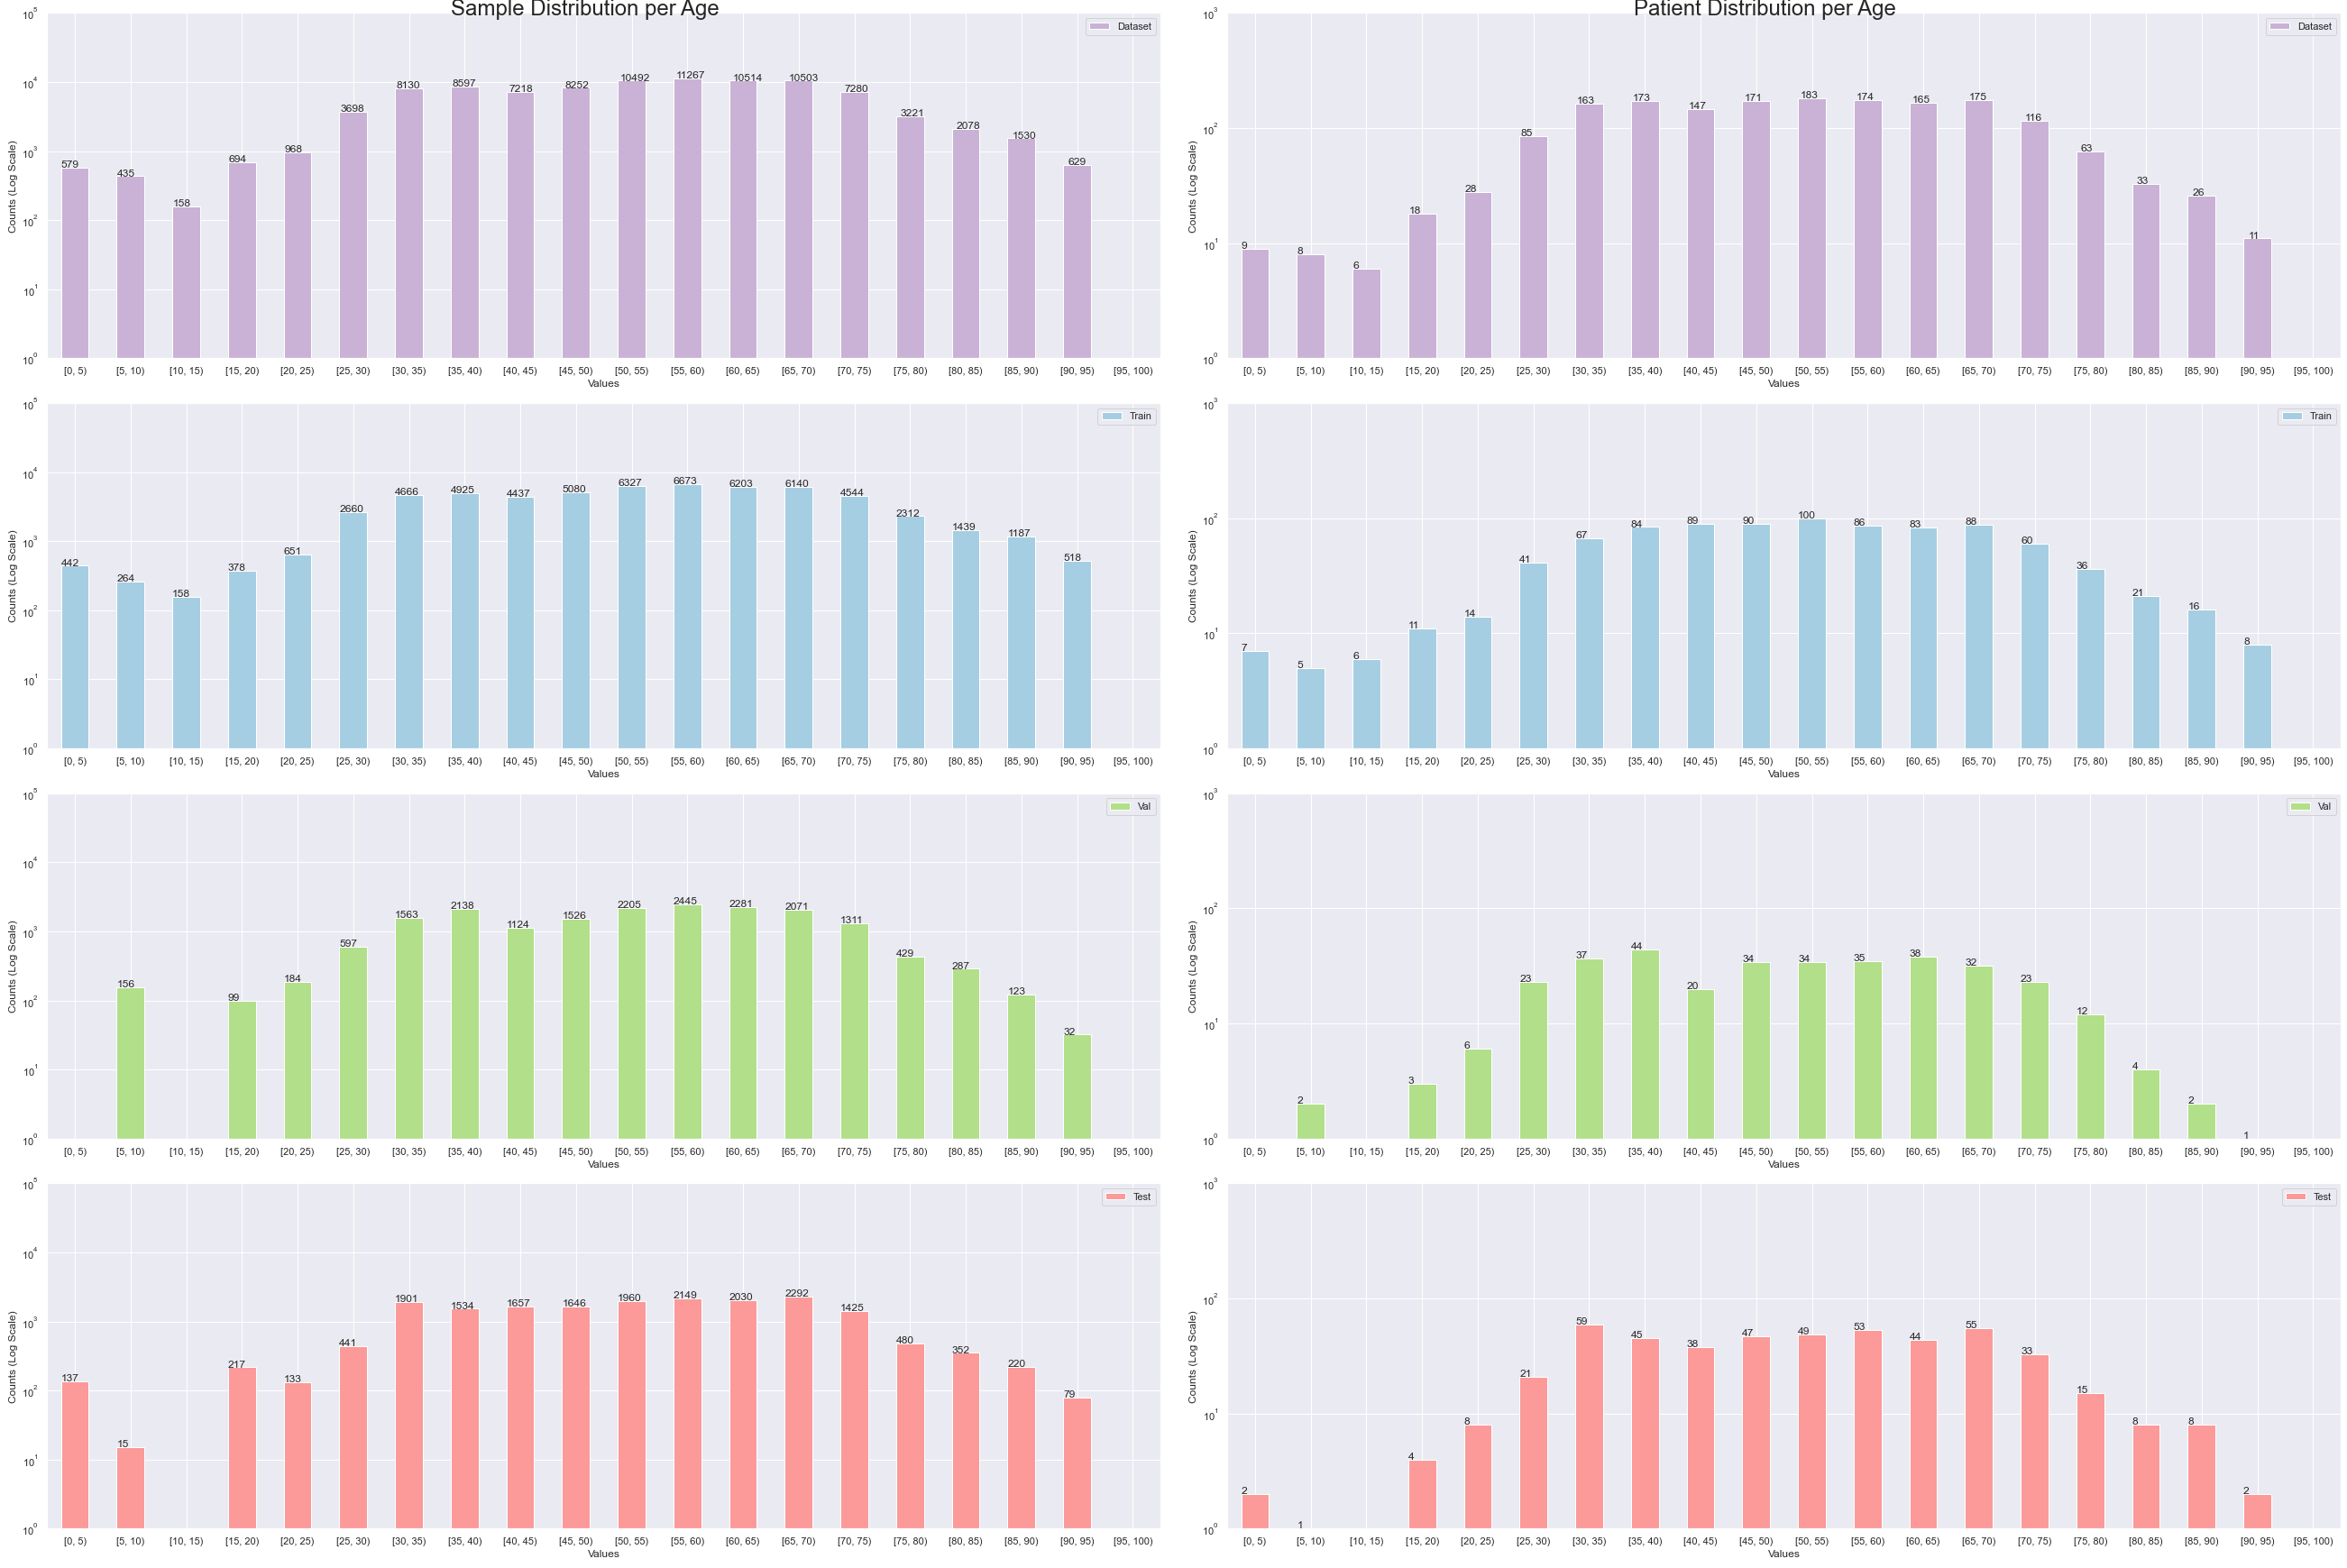

In [12]:
plot.column_as_histograms( samples_df, patient_df, "age", dataset_name, figsize = (36, 24))

In [13]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = True )

,Dataset,Train,Val,Test
Values,,,,
"[0, 5)",579,442,0,137
"[5, 10)",435,264,156,15
"[10, 15)",158,158,0,0
"[15, 20)",694,378,99,217
"[20, 25)",968,651,184,133
"[25, 30)",3698,2660,597,441
"[30, 35)",8130,4666,1563,1901
"[35, 40)",8597,4925,2138,1534
"[40, 45)",7218,4437,1124,1657


## Sex

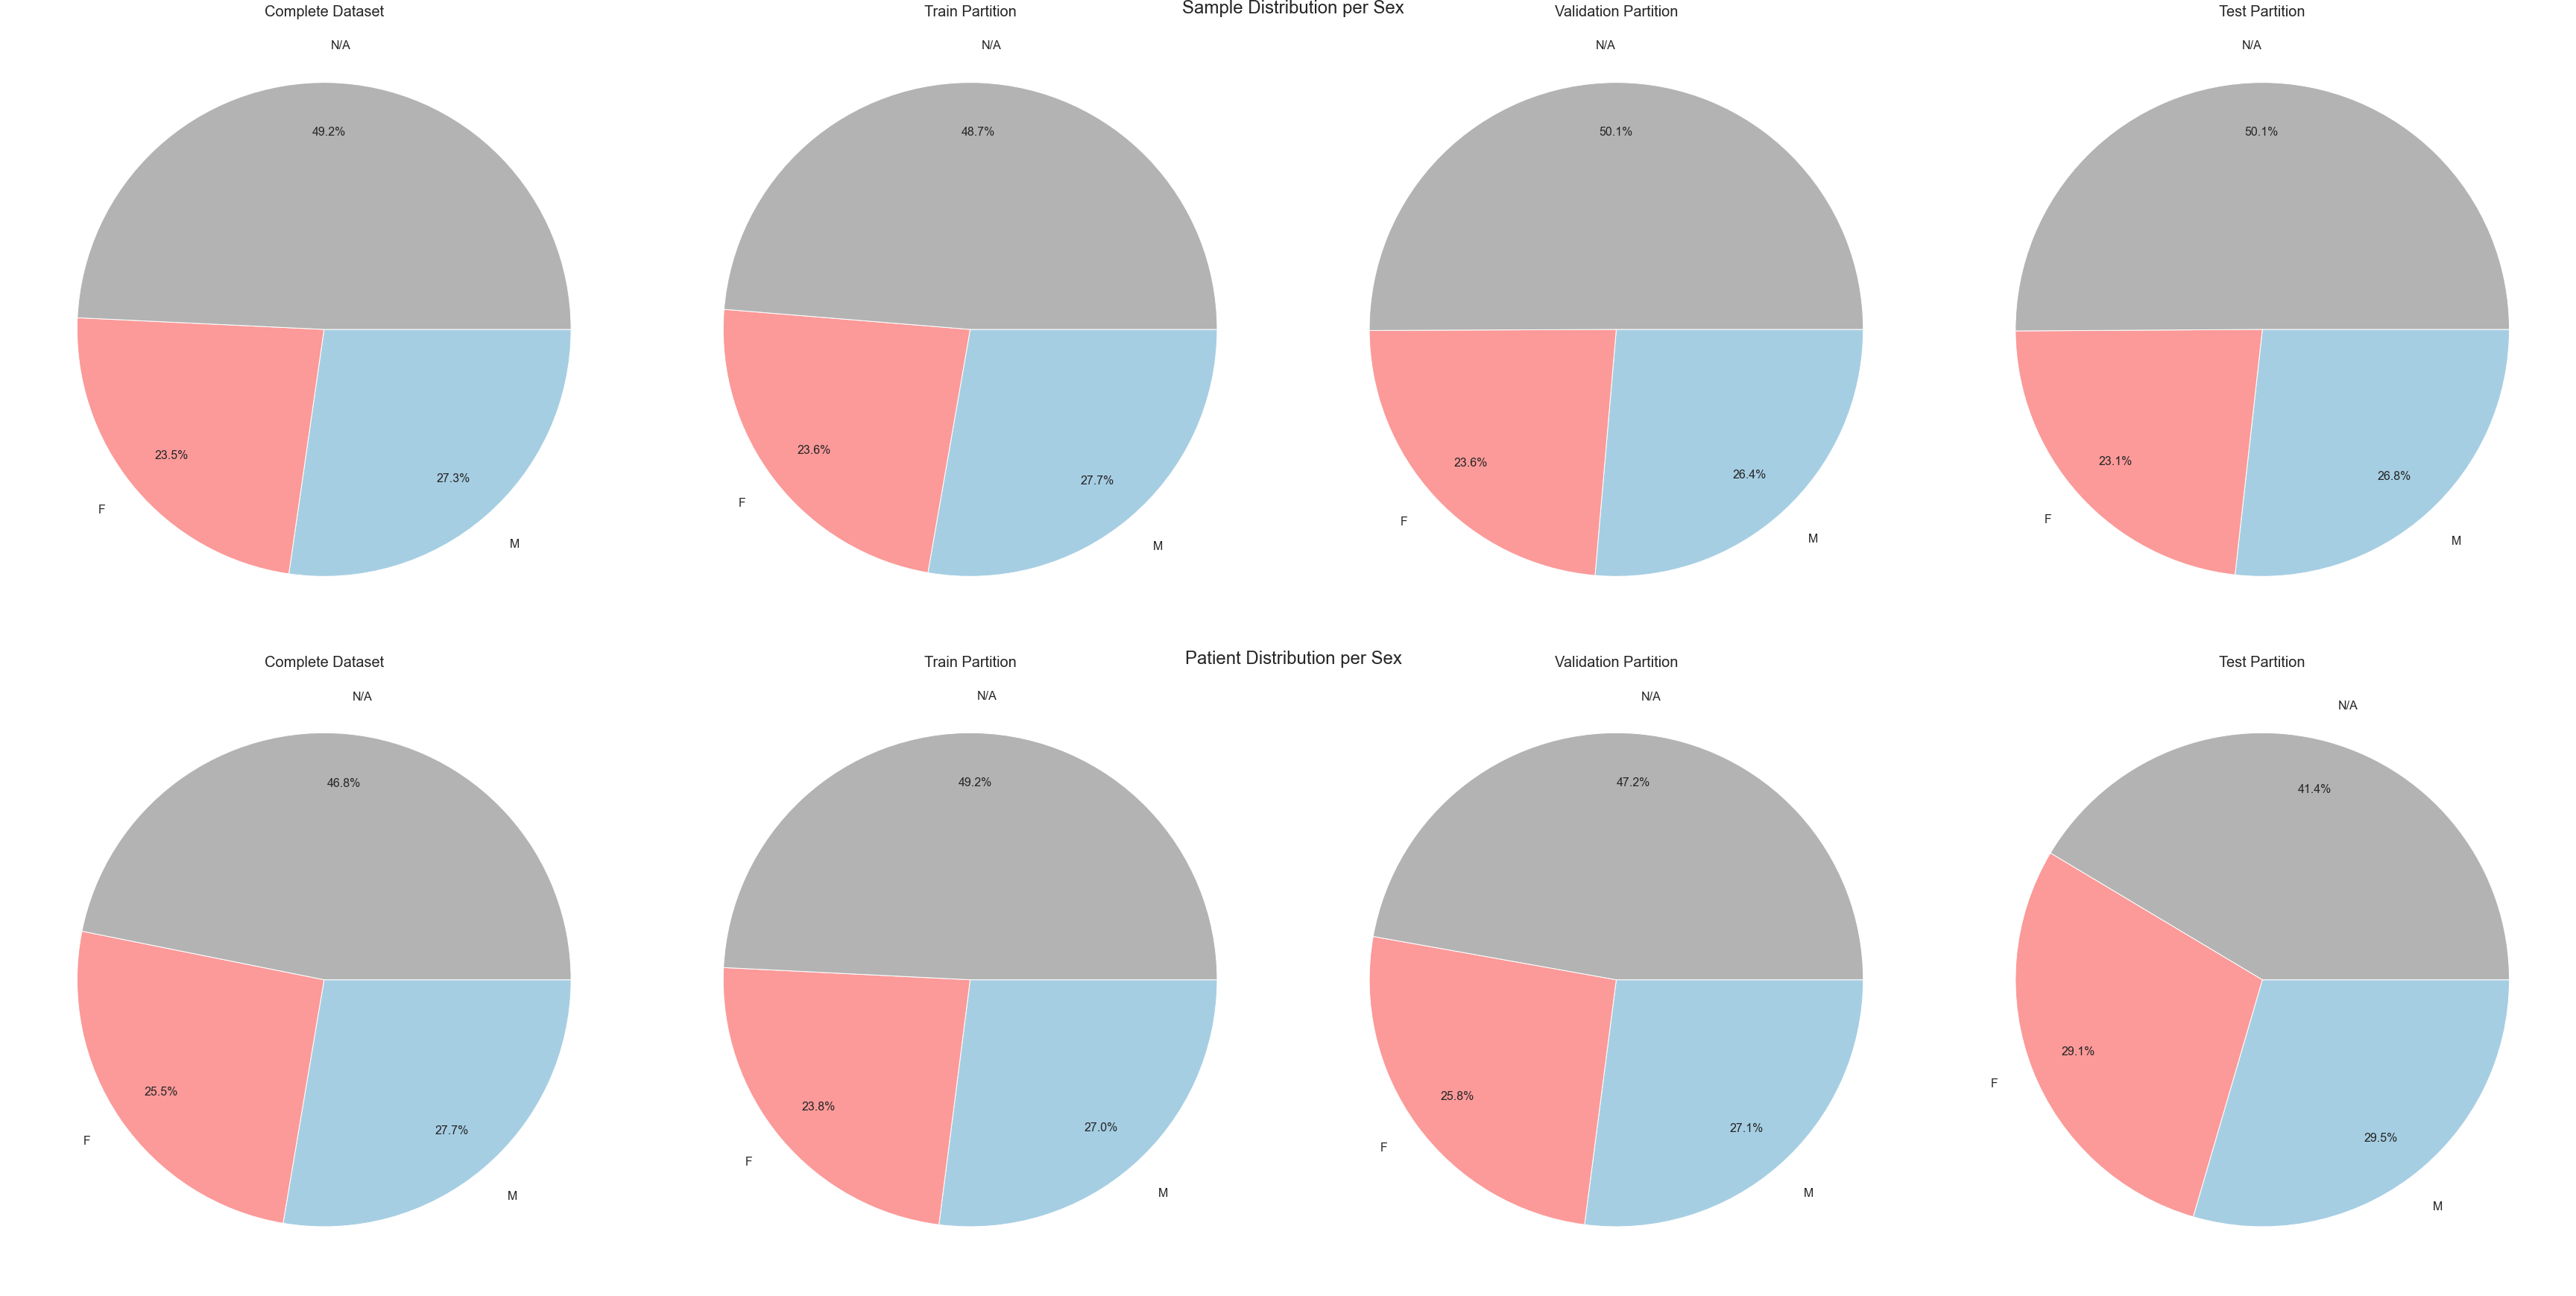

In [14]:
plot.column_as_pies( samples_df, patient_df, "sex", dataset_name, figsize = (48, 24) )

In [15]:
plot.column_as_table( samples_df, patient_df, "sex", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
N/A,107907,64746,21508,21653
M,59773,36876,11328,11569
F,51441,31318,10123,10000
SUM,219121,132940,42959,43222
,Dataset,Train,Val,Test
Values,,,,
N/A,1628,938,328,362
M,961,515,188,258
F,886,453,179,254


## Country

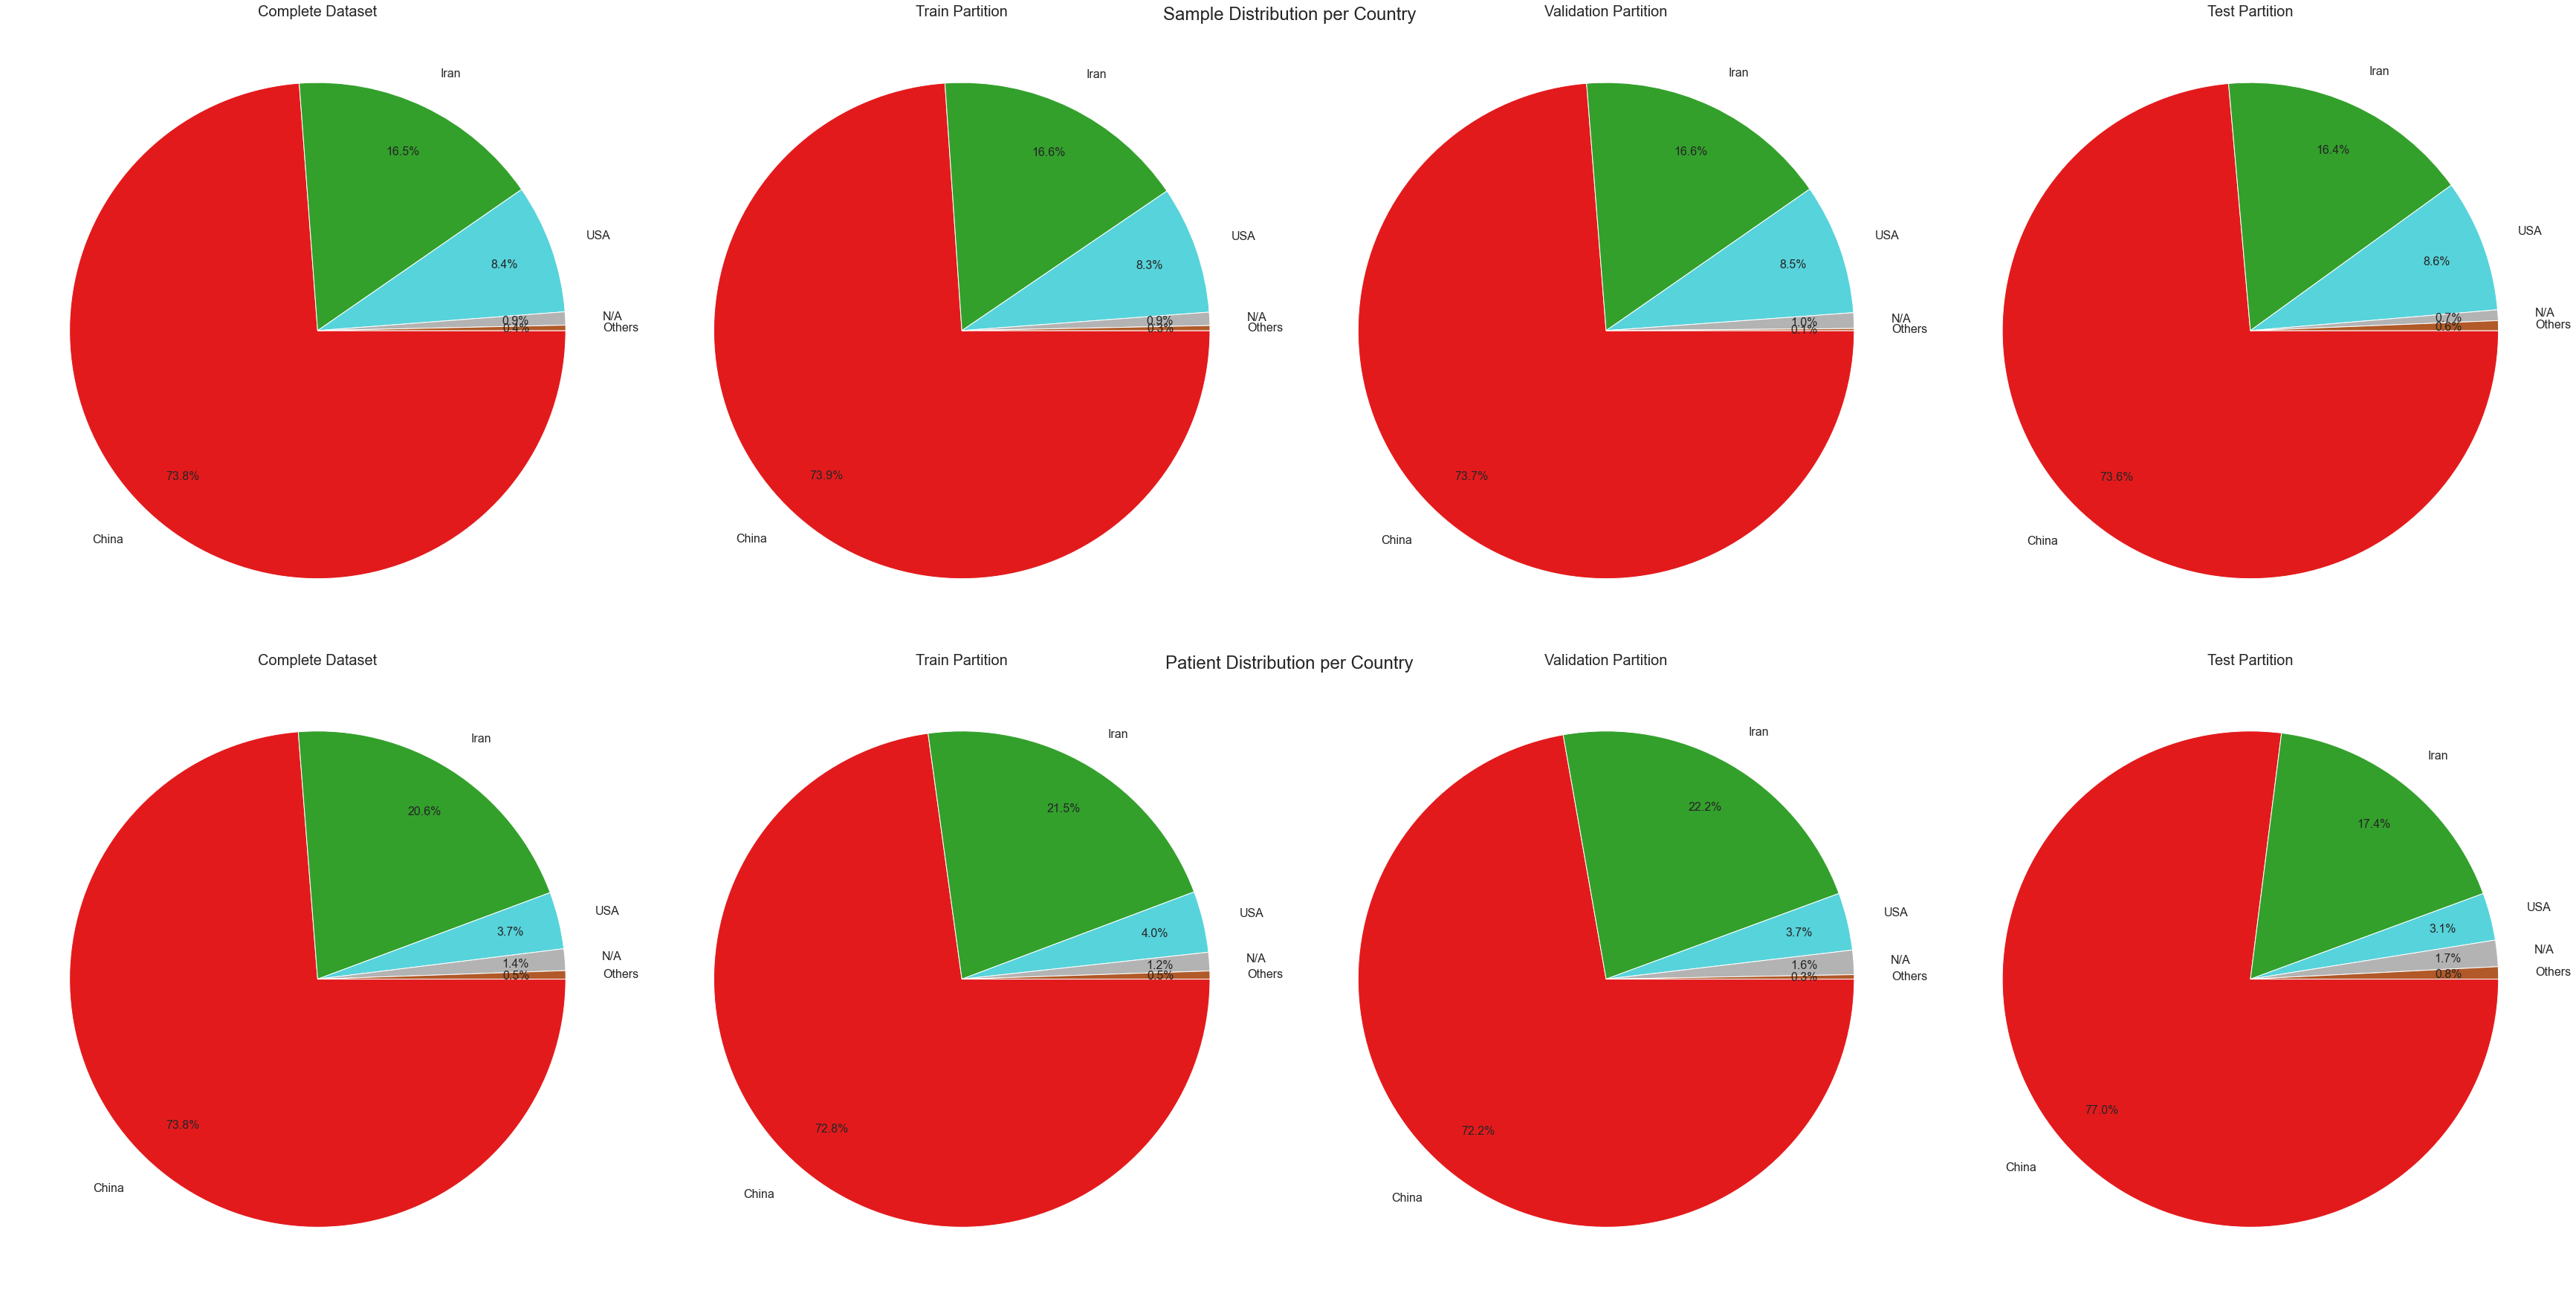

In [16]:
plot.column_as_pies( samples_df, patient_df, "country", dataset_name, figsize = (48, 24) )

In [17]:
plot.column_as_table( samples_df, patient_df, "country", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
China,161749,98258,31680,31811
Iran,36256,22030,7125,7101
USA,18460,11071,3658,3731
N/A,1888,1149,438,301
Australia,287,187,33,67
Algeria,109,45,25,39
Italy,99,99,0,0
England,72,0,0,72
Scotland,71,0,0,71


## Partition

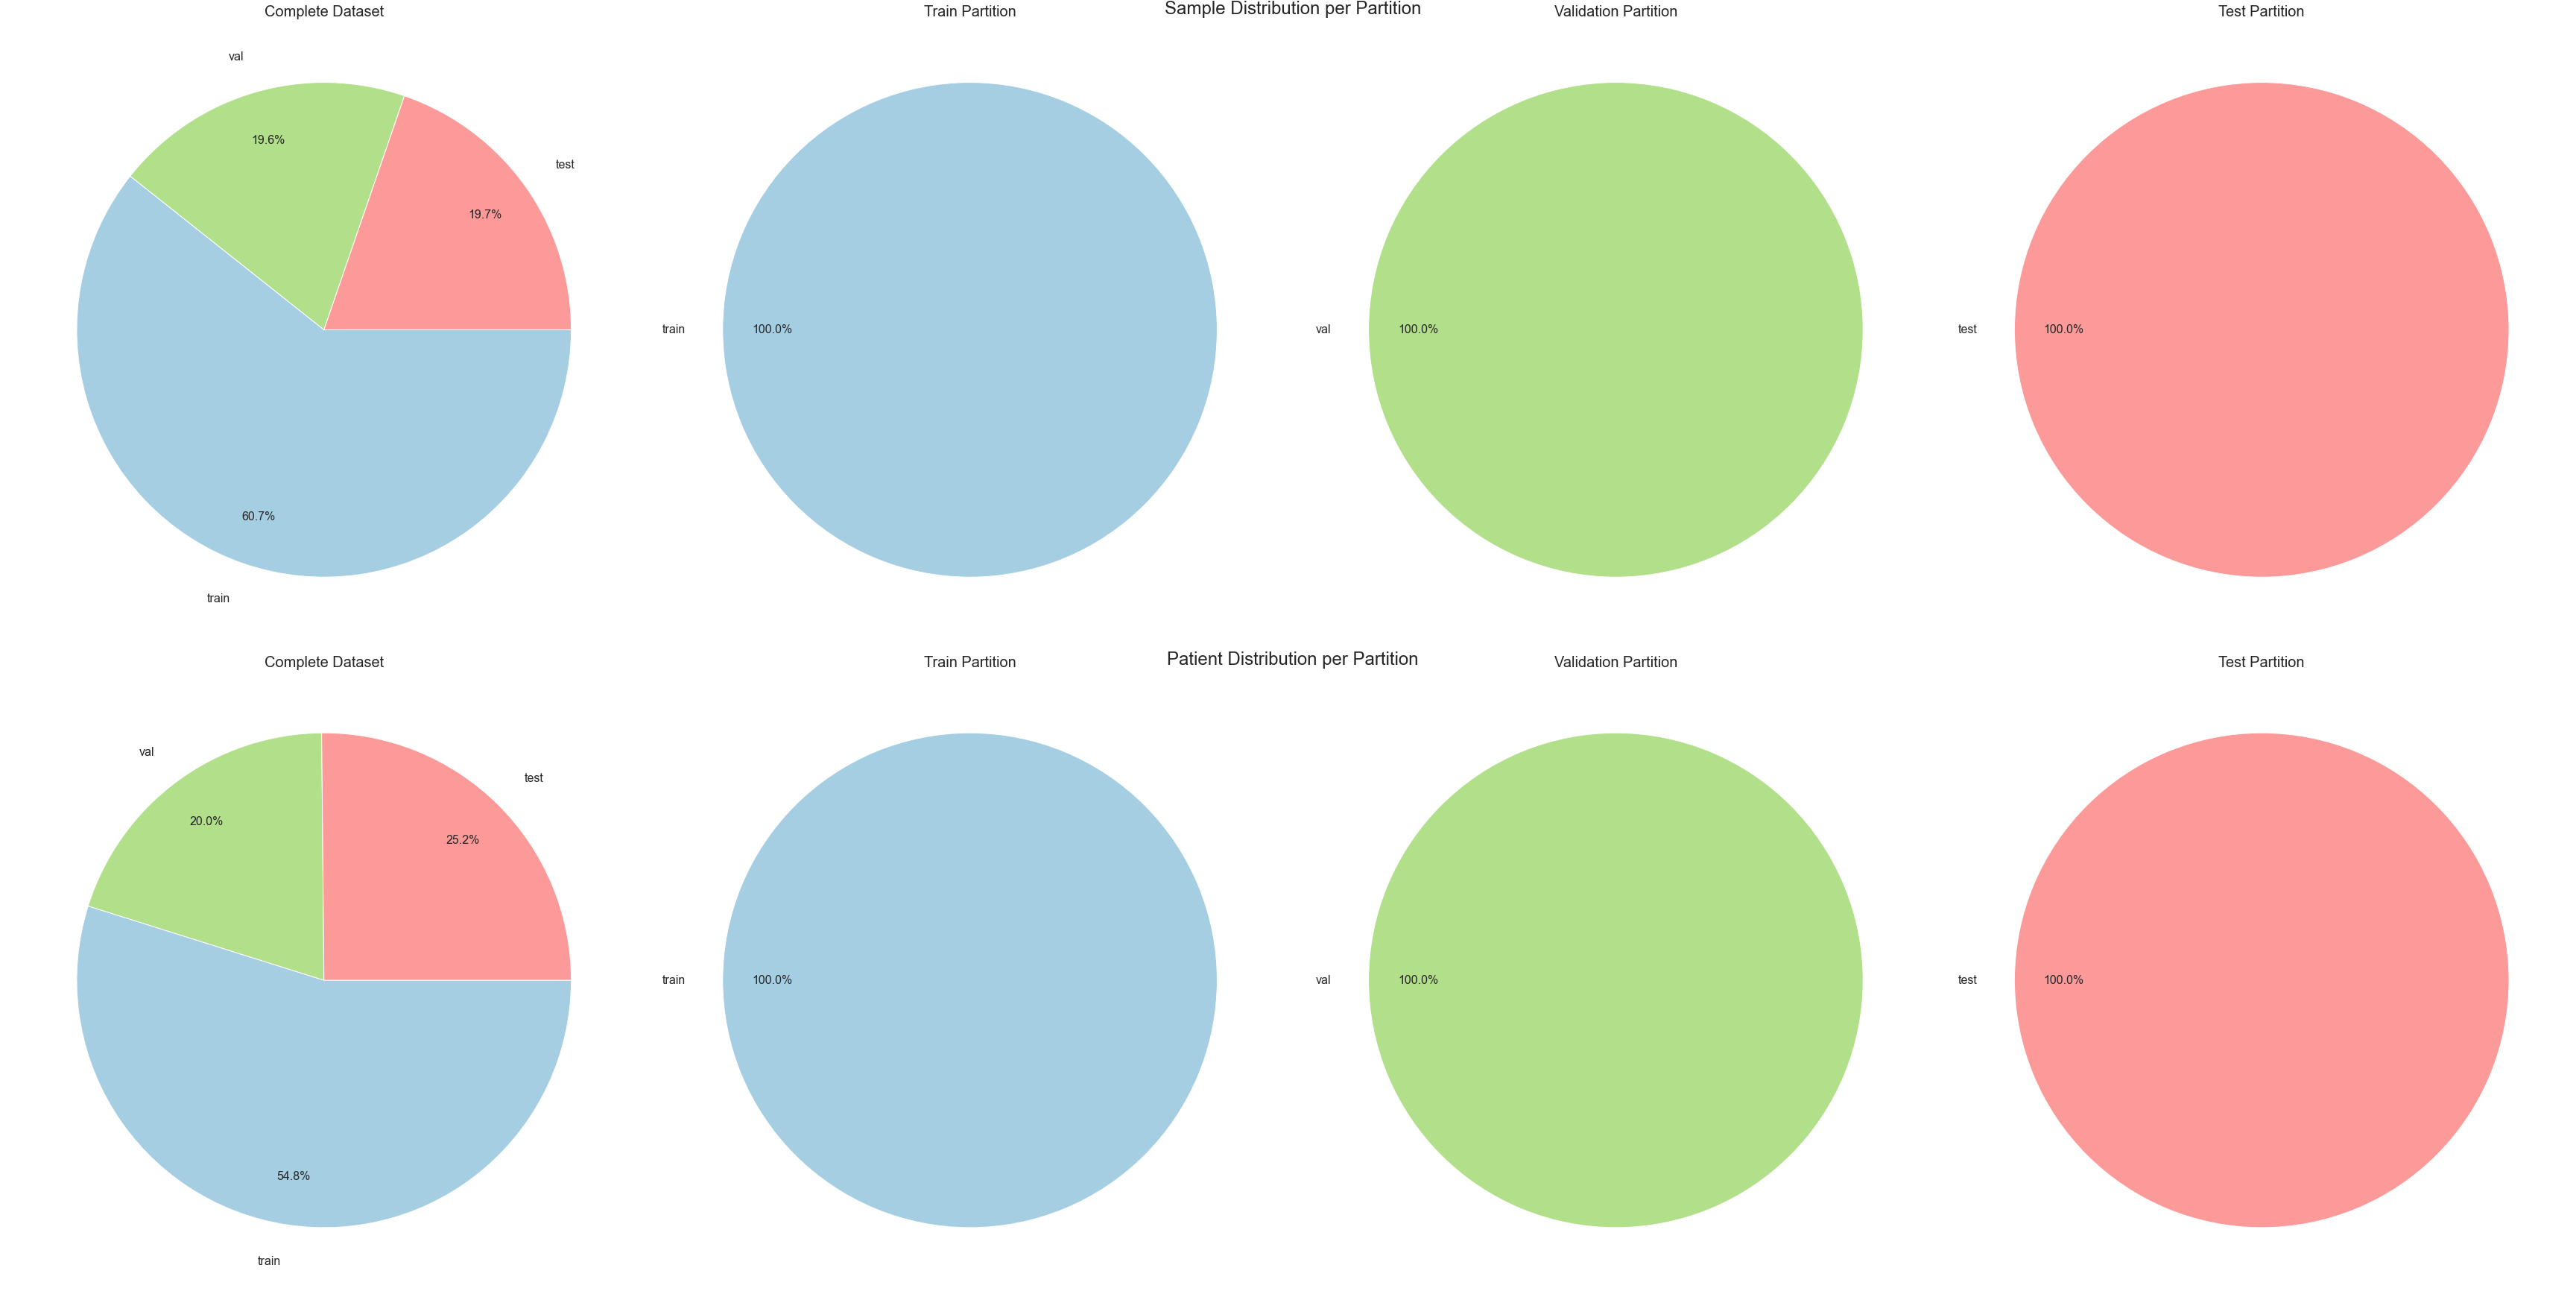

In [18]:
plot.column_as_pies( samples_df, patient_df, "partition", dataset_name, figsize = (48, 24) )

In [19]:
plot.column_as_table( samples_df, patient_df, "partition", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
train,132940,132940,0,0
test,43222,0,0,43222
val,42959,0,42959,0
SUM,219121,132940,42959,43222
,Dataset,Train,Val,Test
Values,,,,
train,1906,1906,0,0
test,874,0,0,874
val,695,0,695,0


## Slice Selection

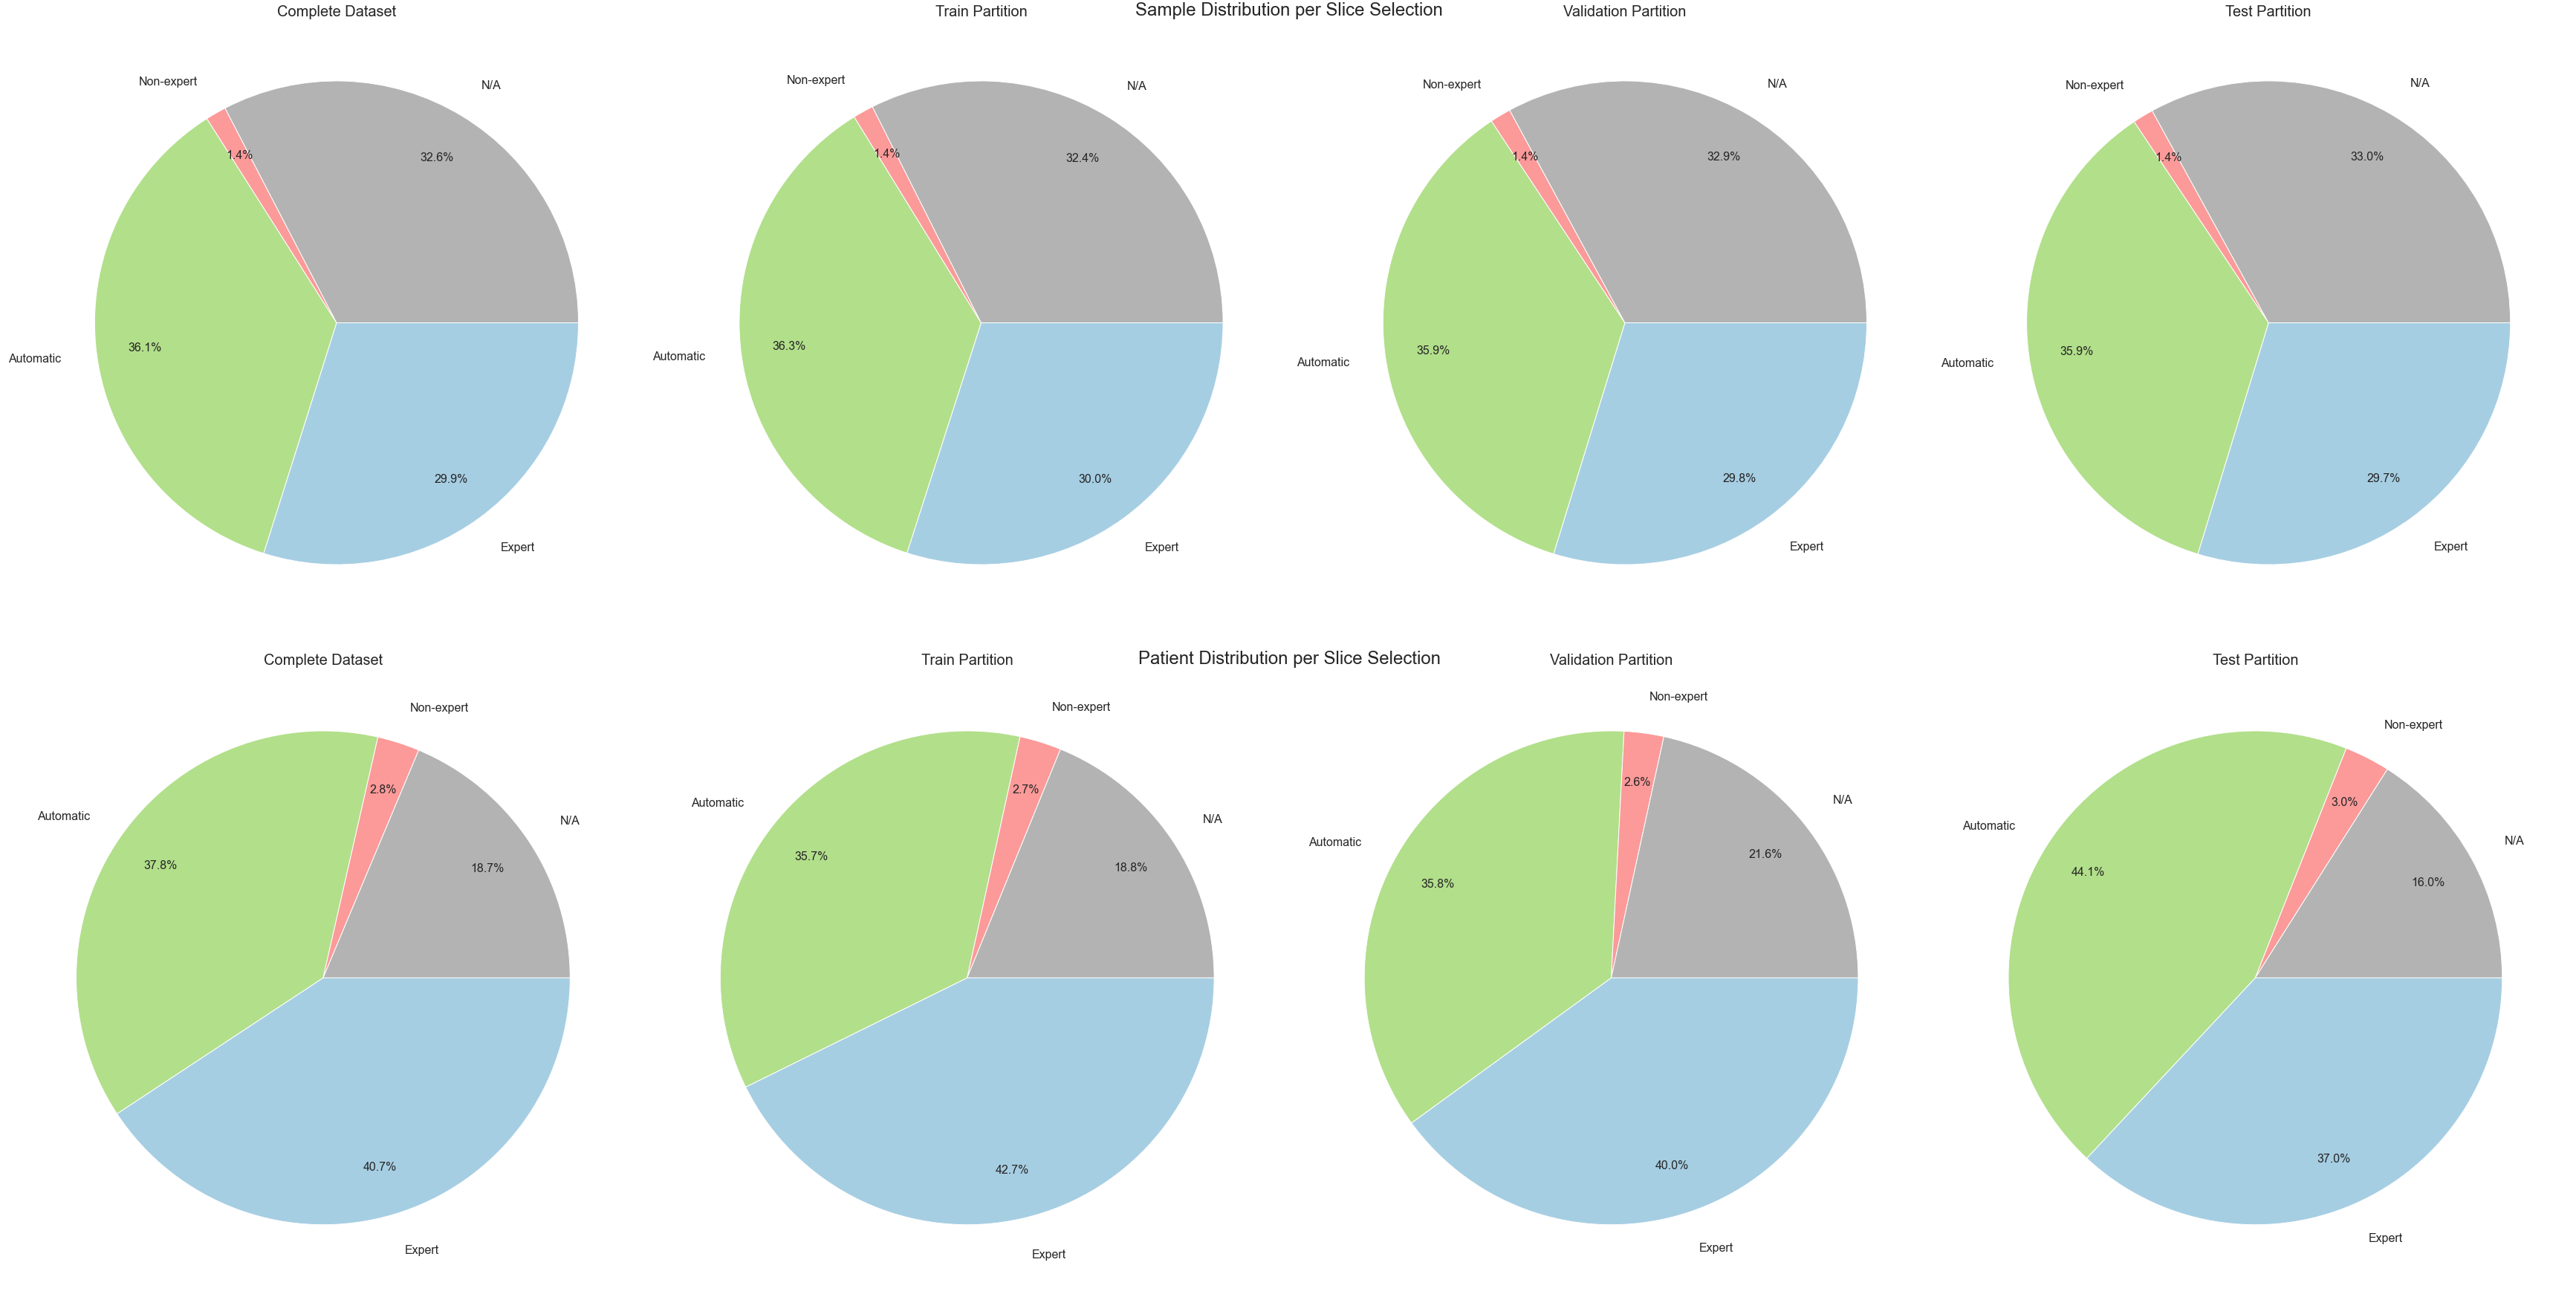

In [20]:
plot.column_as_pies( samples_df, patient_df, "slice_selection", dataset_name, figsize = (48, 24) )

In [21]:
plot.column_as_table( samples_df, patient_df, "slice_selection", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
Automatic,79147,48192,15436,15519
N/A,71488,43096,14135,14257
Expert,65462,39828,12787,12847
Non-expert,3024,1824,601,599
SUM,219121,132940,42959,43222
,Dataset,Train,Val,Test
Values,,,,
Expert,1415,814,278,323
Automatic,1315,681,249,385


# Registering Changes

In [22]:
# Relative path to dataset
image_dir = os.path.join( "..", "..", "..", "..", "Datasets", "COVID19", "CT", "classification" )
samples_df.to_csv( os.path.join(image_dir, "miniCOVIDxCT_data.csv"), index = False, sep = ";" )
samples_df.head()

,filename,patient_id,source,class,country,sex,age,partition,slice_selection,x_min,y_min,x_max,y_max,verified_finding,view,modality,keep
0,NCP_96_1328_0032.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,9,94,512,405,Yes,Axial,CT,True
1,NCP_96_1328_0035.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,106,512,405,Yes,Axial,CT,True
2,NCP_96_1328_0036.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,105,512,406,Yes,Axial,CT,True
3,NCP_96_1328_0037.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,104,512,406,Yes,Axial,CT,True
4,NCP_96_1328_0038.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,103,512,406,Yes,Axial,CT,True
